In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Visualization: Real Data

In [44]:
# Load the data
dataset_path = "data/training_data/microbial_novel_alpha_faith_pd"  # Update this with the correct path
file_path = os.path.join(dataset_path, "data.npy")

with open(file_path, "rb") as f:
    paths = np.load(f)          # Shape: (N, 1, T)
    observed_dates = np.load(f) # Shape: (N, T) - Boolean
    nb_obs = np.load(f)
    signature = np.load(f)
    dynamic = np.load(f)
    static = np.load(f)
    abx_observed = np.load(f)
    hosts = np.load(f)
    abx_exposure = np.load(f)

In [45]:
observed_dates = observed_dates.astype(bool)
abx_observed = abx_observed.astype(bool)

In [46]:
paths_abx = paths[abx_observed]
observed_dates_abx = observed_dates[abx_observed]
paths_noabx = paths[~abx_observed]
observed_dates_noabx = observed_dates[~abx_observed]

### Abx hosts trajectories

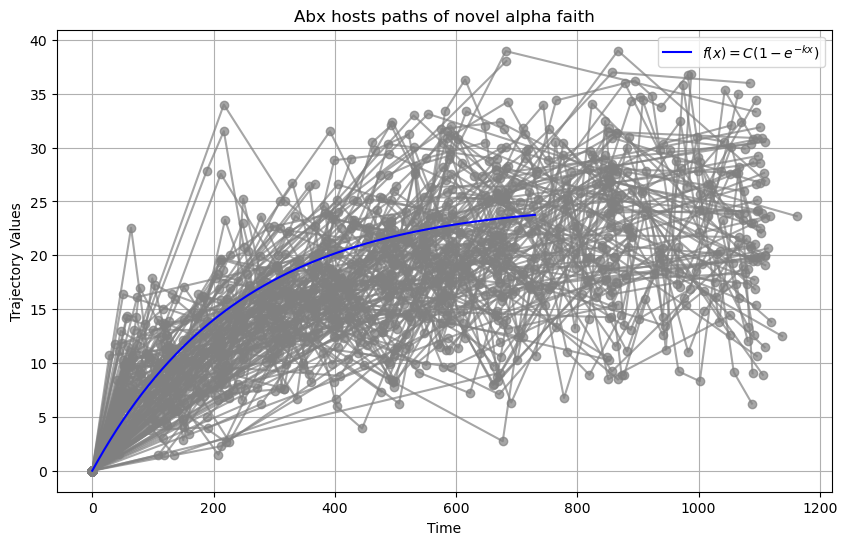

In [47]:
# Constants
C = 25     # Asymptotic max f(x) -> 25
k = 3

# Define function
def f(x):
    return C * (1 - np.exp(-k * x))

# Plot function
x_values = np.linspace(0,1,731)
y_values = f(x_values)

# Ensure correct shape
N, _, T = paths_abx.shape

# Plot
plt.figure(figsize=(10, 6))
for i in range(N):
    time_indices = np.arange(T)
    plt.plot(time_indices[observed_dates_abx[i]], paths_abx[i, 0, observed_dates_abx[i]], color='grey', marker='o', linestyle='-', alpha=0.7)
plt.plot(np.arange(731), y_values, label=r"$f(x) = C(1 - e^{-kx})$", color='b')
plt.xlabel("Time")
plt.ylabel("Trajectory Values")
plt.title("Abx hosts paths of novel alpha faith")
plt.legend()
plt.grid(True)
plt.show()

### No-Abx hosts trajectories

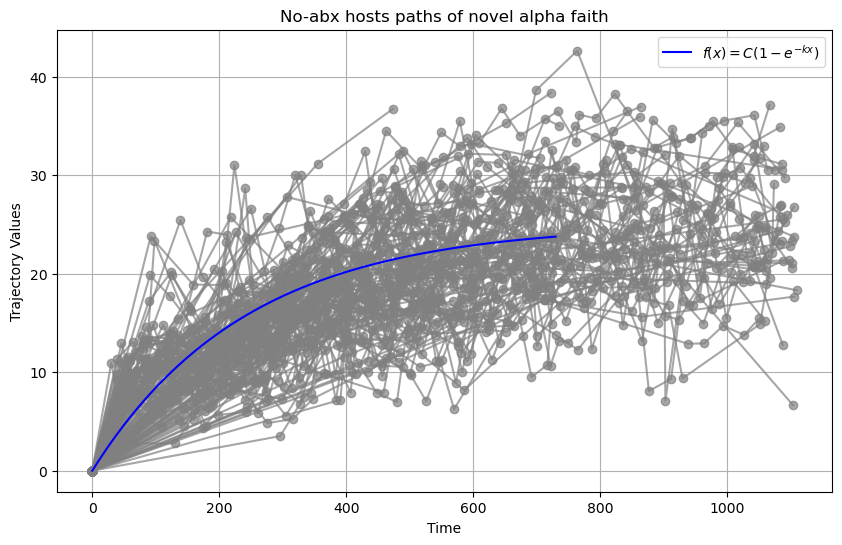

In [48]:
# Constants
C = 25     # Asymptotic max f(x) -> 25
k = 3

# Define function
def f(x):
    return C * (1 - np.exp(-k * x))

# Plot function
x_values = np.linspace(0,1,731)
y_values = f(x_values)

# Ensure correct shape
N, _, T = paths_noabx.shape

# Plot
plt.figure(figsize=(10, 6))
for i in range(N):
    time_indices = np.arange(T)
    plt.plot(time_indices[observed_dates_noabx[i]], paths_noabx[i, 0, observed_dates_noabx[i]], color='grey', marker='o', linestyle='-', alpha=0.7)
plt.plot(np.arange(731), y_values, label=r"$f(x) = C(1 - e^{-kx})$", color='b')
plt.xlabel("Time")
plt.ylabel("Trajectory Values")
plt.title("No-abx hosts paths of novel alpha faith")
plt.legend()
plt.grid(True)
plt.show()

### All hosts trajectories

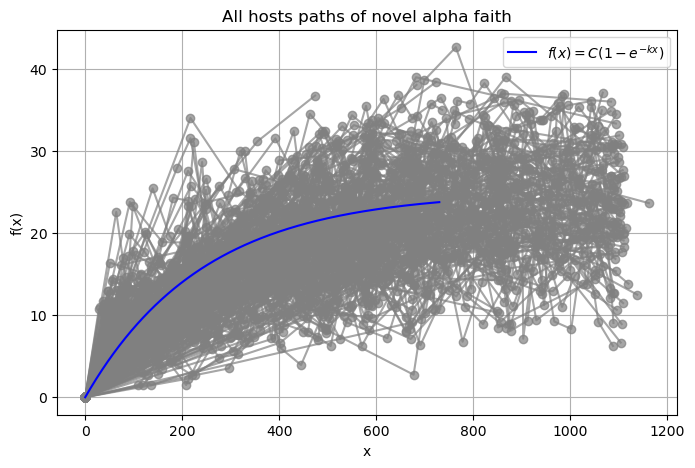

In [49]:
# Constants
C = 25     # Asymptotic max f(x) -> 25
k = 3

# Define function
def f(x):
    return C * (1 - np.exp(-k * x))

# Plot function
x_values = np.linspace(0,1,731)
y_values = f(x_values)

# Plot
plt.figure(figsize=(8, 5))
N, _, T = paths.shape
for i in range(N):
    time_indices = np.arange(T)
    plt.plot(time_indices[observed_dates[i]], paths[i, 0, observed_dates[i]], color='grey', marker='o', linestyle='-', alpha=0.7)
plt.plot(np.arange(731), y_values, label=r"$f(x) = C(1 - e^{-kx})$", color='b')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("All hosts paths of novel alpha faith")
plt.legend()
plt.grid()
plt.show()

### Dynamic variables

##### Diet Weaning

In [50]:
diet_weaning = dynamic[:,2:5,:]

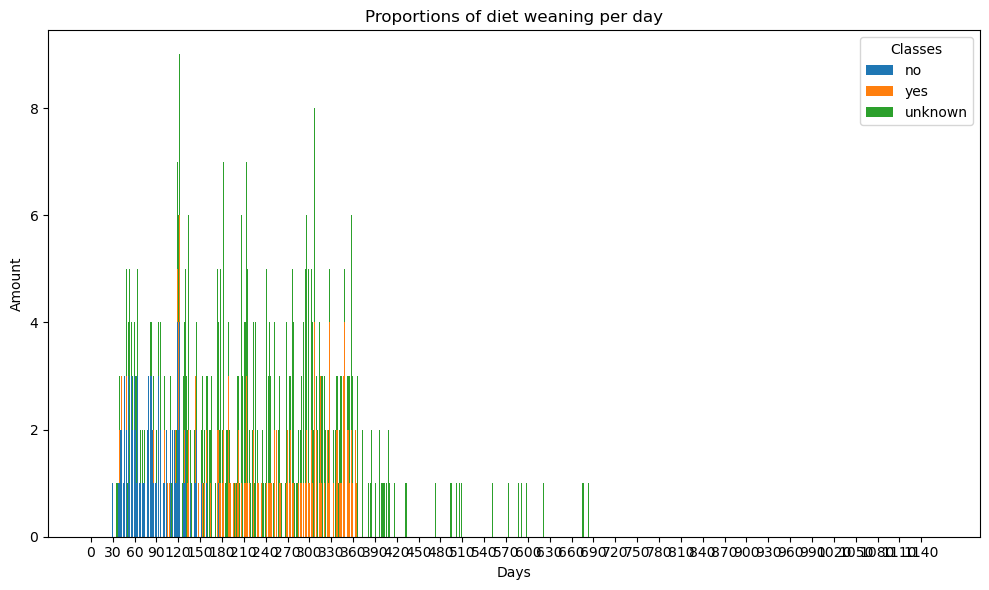

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Assume `array` is your input array of shape (N, 3, T)
# Here we simulate an example array for demonstration purposes.
N, _, T = diet_weaning.shape  # Example dimensions

# Calculate the proportions of 1's for each class (0, 1, 2) at each time step
proportions = np.sum(diet_weaning, axis=0)  # Shape (3, T)

# Define the labels for the dimensions
labels = ['no', 'yes', 'unknown']

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bottoms = np.zeros(T)  # To stack the bars
for i in range(3):
    ax.bar(np.arange(T), proportions[i], bottom=bottoms, label=labels[i])
    bottoms += proportions[i]  # Update the bottom for the next segment

# Customize the plot
ax.set_title('Proportions of diet weaning per day')
ax.set_xlabel('Days')
ax.set_ylabel('Amount')
xticks = np.arange(0, T, 30)
ax.set_xticks(xticks)
ax.set_xticklabels([t for t in xticks])  # Time step labels
ax.legend(title="Classes")

# Display the plot
plt.tight_layout()
plt.show()

##### Diet Milk

In [52]:
diet_milk = dynamic[:,5:,:]

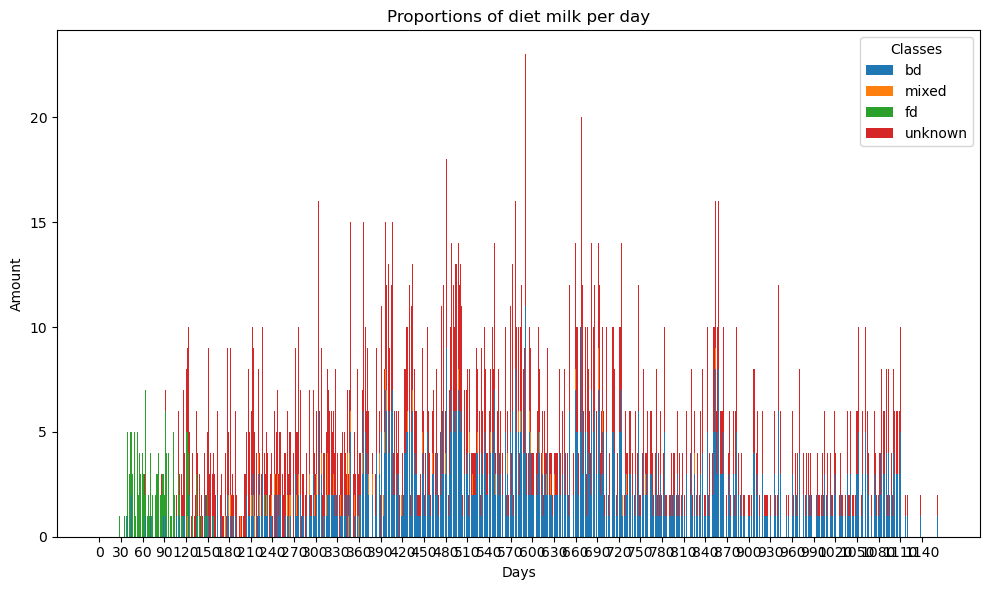

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Assume `array` is your input array of shape (N, 3, T)
# Here we simulate an example array for demonstration purposes.
N, _, T = diet_milk.shape  # Example dimensions

# Calculate the proportions of 1's for each class (0, 1, 2) at each time step
proportions = np.sum(diet_milk, axis=0)  # Shape (3, T)

# Define the labels for the dimensions
labels = ['bd', 'mixed', 'fd', 'unknown']

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bottoms = np.zeros(T)  # To stack the bars
for i in range(4):
    ax.bar(np.arange(T), proportions[i], bottom=bottoms, label=labels[i])
    bottoms += proportions[i]  # Update the bottom for the next segment

# Customize the plot
ax.set_title('Proportions of diet milk per day')
ax.set_xlabel('Days')
ax.set_ylabel('Amount')
xticks = np.arange(0, T, 30)
ax.set_xticks(xticks)
ax.set_xticklabels([t for t in xticks])  # Time step labels
ax.legend(title="Classes")

# Display the plot
plt.tight_layout()
plt.show()

# Visualization: Synthetic Data

In [30]:
data_path = "data/training_data/Microbiome_OrnsteinUhlenbeck-2"
with open('{}/data.npy'.format(data_path), 'rb') as f:
    final_paths = np.load(f)
    observed_dates = np.load(f)
    nb_obs = np.load(f)
    signature = np.load(f)
    dynamic = np.load(f)
    static = np.load(f)
    abx_observed = np.load(f)
    hosts = np.load(f)
    abx_exposure = np.load(f)
    exposure_steps = np.load(f, allow_pickle=True)
observed_dates = observed_dates.astype(np.bool)
abx_exposure = abx_exposure.astype(np.bool)

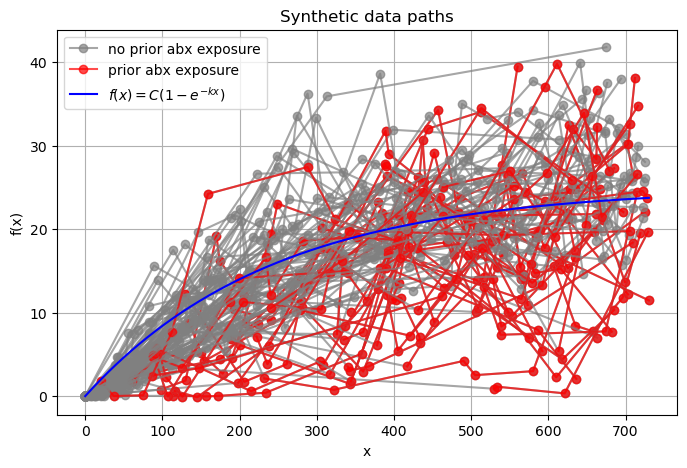

In [31]:
# Constants
C = 25
k = 3
# Define function
def f(x):
    return C * (1 - np.exp(-k * x))
# Plot function
x_values = np.linspace(0,1,731)
y_values = f(x_values)

# Plot
plt.figure(figsize=(8, 5))
N, _, T = final_paths.shape
time_indices = np.arange(T)
nb_path_to_plot = 100
for i in range(nb_path_to_plot):
    if i == 0:
        plt.plot(time_indices[observed_dates[i]], final_paths[i, 0, observed_dates[i]], color='grey', marker='o', linestyle='-', alpha=0.7, label='no prior abx exposure')
        plt.plot(time_indices[abx_exposure[i]], final_paths[i, 0, abx_exposure[i]], color='red', marker='o', linestyle='-', alpha=0.7, label='prior abx exposure')
    else:
        plt.plot(time_indices[observed_dates[i]], final_paths[i, 0, observed_dates[i]], color='grey', marker='o', linestyle='-', alpha=0.7)
        plt.plot(time_indices[abx_exposure[i]], final_paths[i, 0, abx_exposure[i]], color='red', marker='o', linestyle='-', alpha=0.7)
plt.plot(time_indices, y_values, label=r"$f(x) = C(1 - e^{-kx})$", color='b')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Synthetic data paths")
plt.legend()
plt.grid()
plt.show()

###  Number of Hosts

In [34]:
for which_split in ["all", "no_abx"]:
    for filename in ["train_idx.npy", "val_idx.npy"]:
        data_path = os.path.join("data", "training_data", "Microbiome_OrnsteinUhlenbeck-2", which_split, filename)
        with open(data_path, 'rb') as f:
            idx = np.load(f)
        print("Split", which_split, "filename", filename, ": {} hosts".format(len(idx)))

Split all filename train_idx.npy : 799 hosts
Split all filename val_idx.npy : 201 hosts
Split no_abx filename train_idx.npy : 402 hosts
Split no_abx filename val_idx.npy : 101 hosts


### Dynamic variables

##### Delivery model

In [9]:
delivery_mode = dynamic[:,:2,:]

##### Diet Weaning

In [10]:
diet_weaning = dynamic[:,2:5,:]

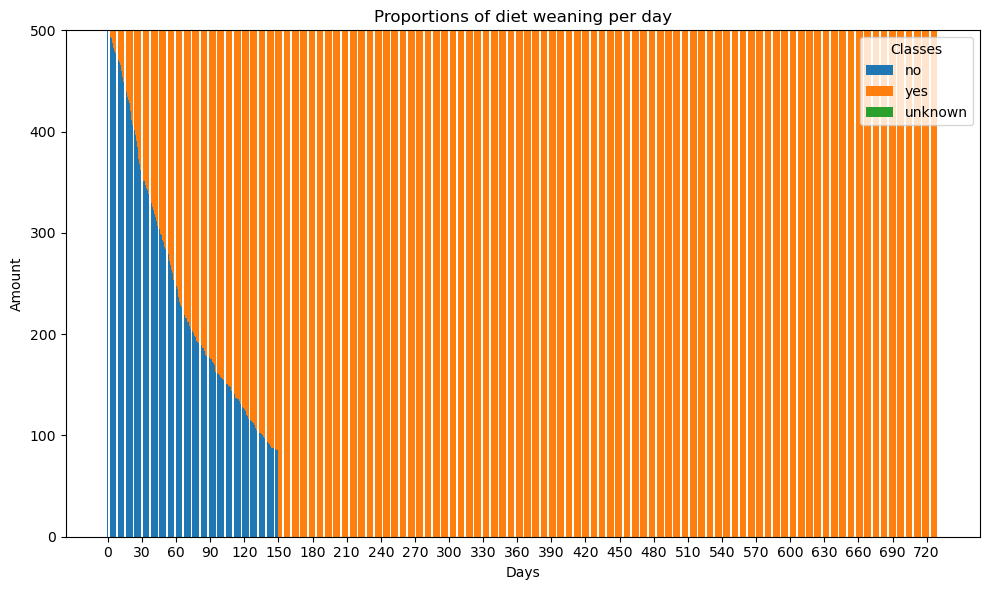

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assume `array` is your input array of shape (N, 3, T)
# Here we simulate an example array for demonstration purposes.
N, _, T = diet_weaning.shape  # Example dimensions

# Calculate the proportions of 1's for each class (0, 1, 2) at each time step
proportions = np.sum(diet_weaning, axis=0)  # Shape (3, T)

# Define the labels for the dimensions
labels = ['no', 'yes', 'unknown']

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bottoms = np.zeros(T)  # To stack the bars
for i in range(3):
    ax.bar(np.arange(T), proportions[i], bottom=bottoms, label=labels[i])
    bottoms += proportions[i]  # Update the bottom for the next segment

# Customize the plot
ax.set_title('Proportions of diet weaning per day')
ax.set_xlabel('Days')
ax.set_ylabel('Amount')
xticks = np.arange(0, T, 30)
ax.set_xticks(xticks)
ax.set_xticklabels([t for t in xticks])  # Time step labels
ax.legend(title="Classes")

# Display the plot
plt.tight_layout()
plt.show()

##### Diet Milk

In [12]:
diet_milk = dynamic[:,5:,:]

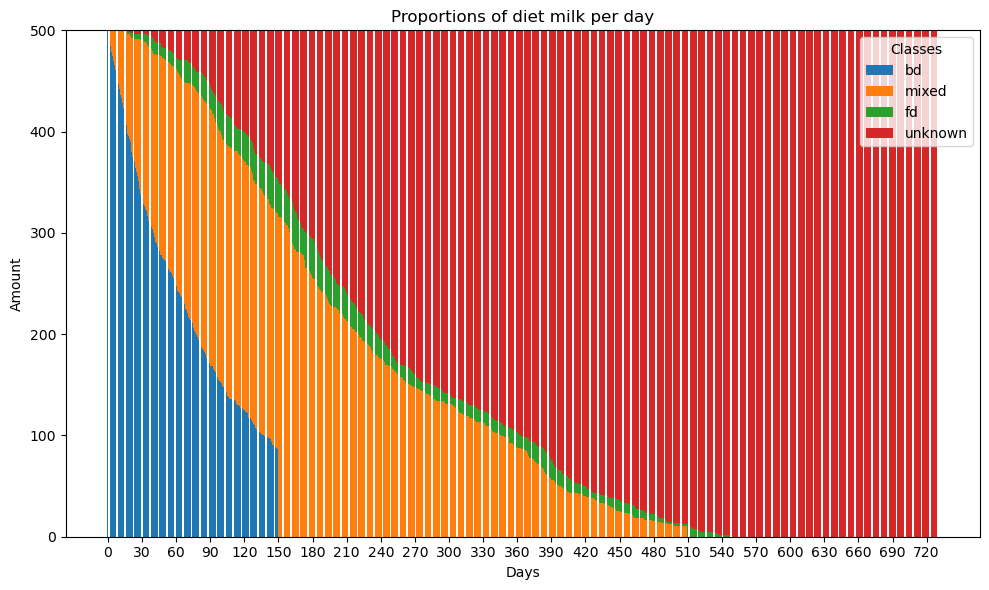

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assume `array` is your input array of shape (N, 3, T)
# Here we simulate an example array for demonstration purposes.
N, _, T = diet_milk.shape  # Example dimensions

# Calculate the proportions of 1's for each class (0, 1, 2) at each time step
proportions = np.sum(diet_milk, axis=0)  # Shape (3, T)

# Define the labels for the dimensions
labels = ['bd', 'mixed', 'fd', 'unknown']

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bottoms = np.zeros(T)  # To stack the bars
for i in range(4):
    ax.bar(np.arange(T), proportions[i], bottom=bottoms, label=labels[i])
    bottoms += proportions[i]  # Update the bottom for the next segment

# Customize the plot
ax.set_title('Proportions of diet milk per day')
ax.set_xlabel('Days')
ax.set_ylabel('Amount')
xticks = np.arange(0, T, 30)
ax.set_xticks(xticks)
ax.set_xticklabels([t for t in xticks])  # Time step labels
ax.legend(title="Classes")

# Display the plot
plt.tight_layout()
plt.show()